In [1]:
# importing the required libraries 

import pandas as pd 
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Data for Q1-3.csv')

In [3]:
# head prints top 5 rows
df.head()

,Gender,Age,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,...,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes
0,0,18,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,class6
1,0,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
2,0,18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
3,1,18,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,class6
4,0,19,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,class6


In [4]:
df.shape

(70, 206)

In [5]:
#iloc is index based slicing 

raw_data = df.iloc[:, 2:205].values
len(raw_data)

70

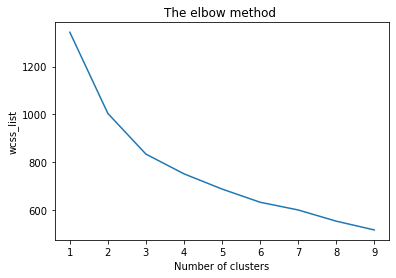

In [6]:
# We need to find the value of k using elbow method.

#wcss is the sum of squared distance betn each point and 
#centroid in cluster



from sklearn.cluster import KMeans
wcss_list = []

for  i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=4)
    kmeans.fit(raw_data)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,10), wcss_list)
plt.title("The elbow method ")
plt.xlabel("Number of clusters")
plt.ylabel("wcss_list")
plt.show()

In [8]:
# from the above plot , the elbow point is at 3 
# hence the number of clusters will be 3

In [9]:
# lets check in attribute 206
print("the actual clusters are ", df.iloc[:, 205].nunique())
print('clusters are', df.iloc[:, 205].unique())


the actual clusters are  7
clusters are ['class6' 'class2' 'class4' 'class7' 'class1' 'class5' 'class3']


In [10]:
# so there are 7 classes in data but according to 
# elbow method itis only 3



In [11]:
model = KMeans(n_clusters=3, init='k-means++', random_state=4)
y_predict = model.fit_predict(raw_data)

In [12]:
x = raw_data

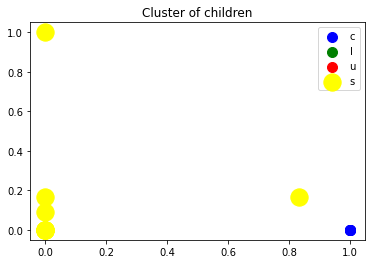

In [13]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'class 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'class 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'class 3') #for third cluster 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')  

plt.title('Cluster of children')
plt.xlabel("")
plt.ylabel("")
plt.legend('cluster')
plt.show()

In [14]:
# Due to the huge number of featuers, the data model has faced cursed of dimensionality 

In [15]:
# In order to reduce overcome the curse of dimensionality function
# dimensionality rediction is used to reduce the feature space with consideradation by 
# a set of principal features

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(raw_data)
transformed = (pca.transform(raw_data))

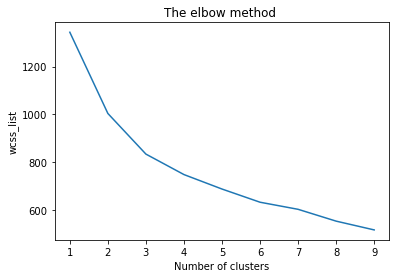

In [17]:
from sklearn.cluster import KMeans
wcss_list = []

for  i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=4)
    kmeans.fit(transformed)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,10), wcss_list)
plt.title("The elbow method ")
plt.xlabel("Number of clusters")
plt.ylabel("wcss_list")
plt.show()

In [18]:
# again building the model with new updated dataset 

model = KMeans(n_clusters=3, init='k-means++', random_state=4)
y_predict = model.fit_predict(transformed)
x = transformed

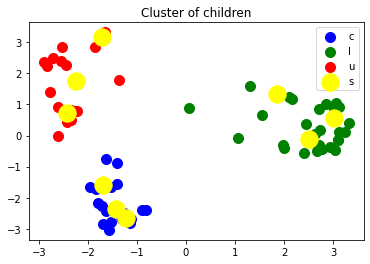

In [19]:

# plotting the diagram

plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'class 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'class 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'class 3') #for third cluster 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')  

plt.title('Cluster of children')
plt.xlabel("")
plt.ylabel("")
plt.legend('cluster')
plt.show()

# Question 2

Components =  70 ;
Total explained variance =  1.0


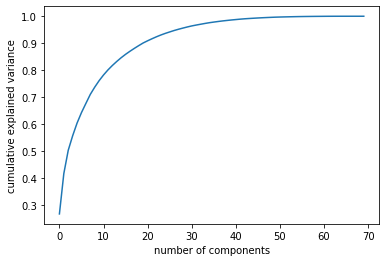

In [20]:
#pca.explained_variance_ratio_
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# reporting loss

Looking at the above plot it seems the huge data is lost. In order to retain  variance more than 90% we nearly 
need to have components more than 30. This shows how much data is lost.Similarly, we can observe the presence of replicate components as they have no significance in retaining the variance.

# Question No 3

Constructing the priniciple components 


> > The components are build in such a way that the first possible principle component accounts for maximum possible variance

>> After having the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues. 

In [21]:
# finding for n :
n = 4 

pca = PCA(n_components = n)
pca.fit(raw_data)
transformed = (pca.transform(raw_data))

print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )


Components =  4 ;
Total explained variance =  0.55766
